<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
# -*- coding: utf-8 -*-
import  random
import urllib.request
import json
import re
import requests
import time


#定义要爬取的微博ID为北京地铁运营
id= str(1005055014)#(input("请输入要抓的微博uid:"))

na='a'
#设置代理IP

iplist=['112.228.161.57:8118','125.126.164.21:34592','122.72.18.35:80','163.125.151.124:9999','114.250.25.19:80']

proxy_addr="125.126.164.21:34592"

#定义页面打开函数
def use_proxy(url,proxy_addr):
    req=urllib.request.Request(url)
    req.add_header("User-Agent","Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/49.0.2623.221 Safari/537.36 SE 2.X MetaSr 1.0")
    proxy=urllib.request.ProxyHandler({'http':random.choice(iplist)})
    opener=urllib.request.build_opener(proxy,urllib.request.HTTPHandler)
    urllib.request.install_opener(opener)
    data=urllib.request.urlopen(req).read().decode('utf-8','ignore')
    return data
#获取微博主页的containerid，爬取微博内容时需要此id
def get_containerid():
    url='https://m.weibo.cn/api/container/getIndex?type=uid&value='+id
    data=use_proxy(url,random.choice(iplist))
    content=json.loads(data).get('data')
    for data in content.get('tabsInfo').get('tabs'):
        if(data.get('tab_type')=='weibo'):
            containerid=data.get('containerid')
    return containerid



In [2]:
for i in range(20):  
    weibo_url='https://m.weibo.cn/api/container/getIndex?type=uid&value='+id+'&containerid='+get_containerid()+'&page='+str(i)
    data=use_proxy(weibo_url,random.choice(iplist))
    content=json.loads(data).get('data')
    cards=content.get('cards')
    print(len(cards))


AttributeError: 'NoneType' object has no attribute 'get'

In [14]:
for card in cards:
        card_type=card.get('card_type')
        #print(card_type)
        if(card_type==0):
                mblog=card.get('mblog')
                #print(mblog
                #if(str(mblog).find("客流")>0)  : 
                text=mblog.get('text')
                print(text)

In [15]:
###匹配相应信息
#示例格式：
#【昨日客流】4月27日（周六），武汉城市轨道交通线网客运量（含换乘）为332.54万乘次，其中客流前五名依次为： 2号线汉口火车站、2号线江汉路站、2号线街道口站、4号线楚河汉街站、2号线中山公园站。 
print(text)
#日期：x月x日
date=re.findall('\d+月\d+日',text)[0]
#星期：周x
day=re.findall('周\S',text)[0]
#客流量
flow=re.findall('为(.*?)万乘次',text)[0]
#排名前五
ranks=re.findall('依次为：(.*?)。',text)[0]
ranks=ranks.split('、')


print(date)
print(day)
print(flow)
print(ranks)
for rank in ranks:
    print(rank)


NameError: name 'text' is not defined

NameError: name 'statisStop' is not defined

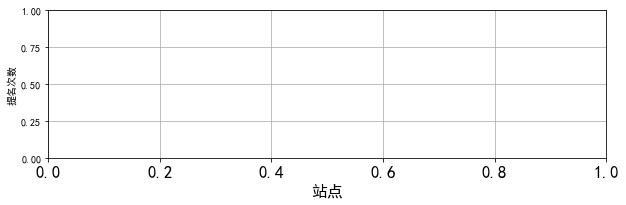

In [16]:
###绘制高峰站点图像
import matplotlib.pyplot as plt
import math
font = {'family' : 'SimHei',
    'weight' : 'bold',
    'size'  : '16'}


fig3 = plt.figure(figsize=(10,6))
#plt.subplots_adjust(hspace=0.3)
# 创建子图及间隔设置
 
ax = fig3.add_subplot(2,1,1)
plt.rc('font', **font) # pass in the font dict as kwargs
plt.rc('axes',unicode_minus=False)


plt.xticks(fontsize = 17)#对坐标的值数值，大小限制
#plt.yticks(fontsize = 37)

plt.xlabel('站点', fontproperties="SimHei")
plt.ylabel('提名次数')
#网格
plt.grid()
plt.bar(list(statisStop.keys()),list(statisStop.values()))
#plt.legend()


ax.set_xticks(range(len(list(statisStop.keys()))))

ax.set_xticklabels(list(statisStop.keys()), rotation=90)
plt.savefig('./stop.jpg')


In [ ]:
##绘制高峰流量图
import matplotlib.pyplot as plt
import math
#设置字体
font = {'family' : 'SimHei',
    'weight' : 'bold',
    'size'  : '16'}

fig3 = plt.figure(figsize=(10,6))
#plt.subplots_adjust(hspace=0.3)

# 创建子图及间隔设置
ax = fig3.add_subplot(2,1,1)
plt.rc('font', **font) # pass in the font dict as kwargs
plt.rc('axes',unicode_minus=False)

#对坐标字体大小限制
plt.xticks(fontsize = 10)
#plt.yticks(fontsize = 37)

#设置坐标标签
plt.xlabel('日期')
plt.ylabel('流量（万乘次）')

#网格
plt.grid()

#将横坐标反转，符合时间逻辑
plt.plot(list(statisFlow.keys())[::-1],list(statisFlow.values())[::-1])


#设置间距
ax.set_xticks(range(0,len(list(statisFlow.keys())),7))
ax.set_xticklabels(list(statisFlow.keys())[::-7], rotation=70)

#保存图片
plt.savefig('./flow.jpg')